In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# read in dataframe
df = pd.read_csv('mushrooms.csv', names=['Class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 
                                         'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
                                         'stalk_surface', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 
                                         'viel_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 
                                         'population', 'habitat'])

# quantify variables in the dataframe
cap_shape = pd.get_dummies(df.cap_shape, dtype=int)
cap_shape.columns = ['01', '02', '03', '04', '05']
cap_surface = pd.get_dummies(df.cap_surface, dtype=int)
cap_surface.columns = ['06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']
cap_color = pd.get_dummies(df.cap_color, dtype=int)
cap_color.columns = ['17', '18', '19']
bruises = pd.get_dummies(df.bruises, dtype=int)
bruises.columns = ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
all = pd.concat([cap_shape, cap_surface, cap_color, bruises], axis=1)
display(all)

,01,02,03,04,05,06,07,08,09,10,...,20,21,22,23,24,25,26,27,28,29
class,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
p,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
e,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
e,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
p,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
e,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
e,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
p,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
# do neural net training
X = all
y = df.index

X_train, X_test, y_train, y_test = train_test_split(X, y)

# scale all data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
iterations = 30
fold = 10

spread = []
for i in range(iterations):
    # confusion matrix info
    precision = []
    recall = []
    f1 = []

    # neural net info
    mlp = MLPClassifier(hidden_layer_sizes=(2, 1), max_iter=iterations)
    mlp.fit(X_train,y_train)

    # fold cross validation
    while (len(f1) < fold):
        predictions = mlp.predict(X_test)
        matrix = confusion_matrix(y_test, predictions)
       
        if (len(matrix) == 2):
            precision.append(matrix[0][0] / (matrix[0][0] + matrix[0][1]))
            recall.append(matrix[0][0] / (matrix[0][0] + matrix[1][0]))
            f1.append((2 * precision[-1] * recall[-1]) / (precision[-1] + recall[-1]))

    display(spread)
    spread.append(sum(f1) / len(f1))



[]

[nan]

[nan, 0.9416025350837482]

[nan, 0.9416025350837482, 0.948764867337603]

[nan, 0.9416025350837482, 0.948764867337603, 0.9809523809523808]

[nan, 0.9416025350837482, 0.948764867337603, 0.9809523809523808, nan]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511,
 0.34878240377062053]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511,
 0.34878240377062053,
 0.9826046074283028]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511,
 0.34878240377062053,
 0.9826046074283028,
 0.6792330191745206]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511,
 0.34878240377062053,
 0.9826046074283028,
 0.6792330191745206,
 0.6792330191745206]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511,
 0.34878240377062053,
 0.9826046074283028,
 0.6792330191745206,
 0.6792330191745206,
 0.8513238289205702]

[nan,
 0.9416025350837482,
 0.948764867337603,
 0.9809523809523808,
 nan,
 0.9019947961838681,
 0.9126637554585153,
 0.9739884393063585,
 0.6792330191745206,
 0.8771008403361344,
 nan,
 0.8837209302325582,
 0.8939264328485883,
 nan,
 0.8565573770491801,
 nan,
 0.6792330191745206,
 nan,
 0.9858490566037739,
 0.9422903516681698,
 0.8778705636743214,
 0.9282153539381854,
 0.8699788583509511,
 0.34878240377062053,
 0.9826046074283028,
 0.6792330191745206,
 0.6792330191745206,
 0.8513238289205702,
 0.8889834113143344]

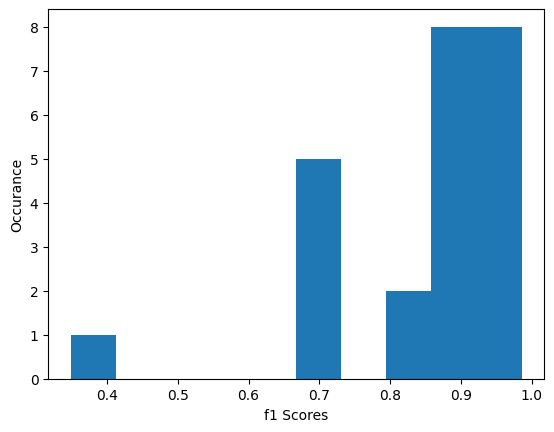

In [3]:
import matplotlib.pyplot as plt
 
# plotting labelled histogram
plt.hist(spread)
plt.xlabel('f1 Scores')
plt.ylabel('Occurance')
plt.show()